In [1]:
# importing packages
import pandas as pd
import mba263
import matplotlib.pyplot as plt

In [2]:
# importing dataset
dfIntuit = pd.read_csv('intuit.csv')
dfIntuit.head()

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0


In [3]:
# describing dataset
dfIntuit.describe(include='all')

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
count,20000.000000,20000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,NaN,0.244400,54350.2613,10.499000,2.079450,93.581000,15.779650,15.751400,0.208250,0.027100,0.215600,0.048050
std,5773.647028,NaN,0.429742,32776.4059,5.766755,1.246361,82.601398,9.527331,10.020435,0.406067,0.162379,0.411248,0.213877
min,1.000000,NaN,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,NaN,0.000000,23451.0000,5.000000,1.000000,37.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,NaN,0.000000,55402.5000,10.500000,2.000000,71.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,NaN,0.000000,89018.7500,15.250000,3.000000,124.500000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# creating new raw data fields
## zip code first number (proxy for region) per https://en.wikipedia.org/wiki/ZIP_Code
dfIntuit['zip_first'] = dfIntuit['zip'].astype(str).str[0]
dfIntuit.head()

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,zip_first
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0,9
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0,9
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0,9
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0,9
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0,9


In [5]:
# creating dummies
## sex dummy variables
sex_dummies = pd.get_dummies(dfIntuit['sex'],drop_first=True,prefix='sex')
## zip first dummy variables
zip_first_dummies = pd.get_dummies(dfIntuit['zip_first'],drop_first=True,prefix='zip_first')
## zip bin dummy variables
zip_bin_dummies = pd.get_dummies(dfIntuit['zip_bins'],drop_first=True,prefix='zip_bins')

dfIntuit = pd.concat([dfIntuit,sex_dummies,zip_first_dummies,zip_bin_dummies],axis=1)
dfIntuit.head()

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_11,zip_bins_12,zip_bins_13,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20
0,1,U,1,99999,20,1,129.5,11,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,U,1,99999,20,2,65.0,4,14,0,...,0,0,0,0,0,0,0,0,0,1
2,3,U,1,99999,20,1,24.5,13,36,1,...,0,0,0,0,0,0,0,0,0,1
3,4,U,1,99999,20,1,80.5,5,19,1,...,0,0,0,0,0,0,0,0,0,1
4,5,U,1,99999,20,1,111.0,14,7,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
## RFM variables
num_tiles = 10
dfIntuit['rec_ntile'] = mba263.ntile(dfIntuit['last'],num_tiles)
dfIntuit['freq_ntile'] = num_tiles - 1 - mba263.ntile(dfIntuit['numords'],num_tiles)
dfIntuit['mon_ntile'] = num_tiles - 1 - mba263.ntile(dfIntuit['dollars'],num_tiles)
dfIntuit.head()

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20,rec_ntile,freq_ntile,mon_ntile
0,1,U,1,99999,20,1,129.5,11,1,0,...,0,0,0,0,0,0,1,3,9,2
1,2,U,1,99999,20,2,65.0,4,14,0,...,0,0,0,0,0,0,1,1,5,5
2,3,U,1,99999,20,1,24.5,13,36,1,...,0,0,0,0,0,0,1,3,9,8
3,4,U,1,99999,20,1,80.5,5,19,1,...,0,0,0,0,0,0,1,1,9,4
4,5,U,1,99999,20,1,111.0,14,7,0,...,0,0,0,0,0,0,1,4,9,2


<Axes: xlabel='mon_ntile'>

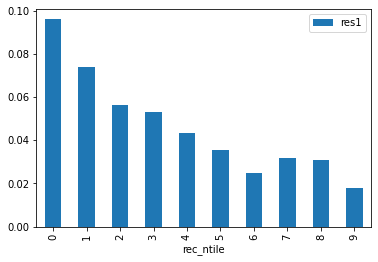

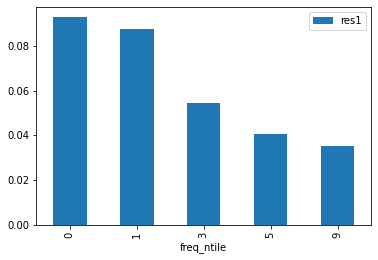

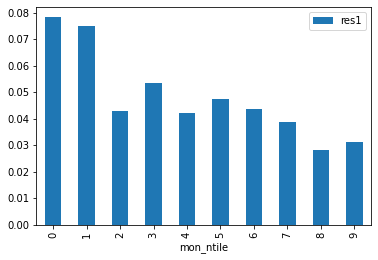

In [7]:
# RFM exploration
dfIntuit[['res1','rec_ntile']].groupby('rec_ntile').mean().plot(kind='bar')
dfIntuit[['res1','freq_ntile']].groupby('freq_ntile').mean().plot(kind='bar')
dfIntuit[['res1','mon_ntile']].groupby('mon_ntile').mean().plot(kind='bar')

<Axes: xlabel='rfm_index'>

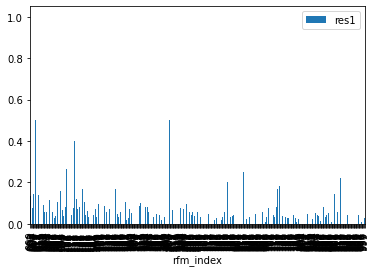

In [8]:
dfIntuit['rfm_index'] = dfIntuit['rec_ntile'].astype(str) + dfIntuit['freq_ntile'].astype(str) + dfIntuit['mon_ntile'].astype(str)

dfIntuit[['res1','rfm_index'] ].groupby('rfm_index').mean().plot(kind='bar')

In [9]:
dfIntuit['responserate_wave1']=mba263.get_means(dfIntuit['res1'],dfIntuit['rfm_index'])
dfIntuit['meets_wave2_mailing_cutoff']=((dfIntuit['responserate_wave1']>(0.0235 * 2)))*1 #  we expect resonse rate to drop by 50% in second mailing, so we need predicted response rate to be 2x breakeven for wave 1
dfIntuitWave2Cutoff=dfIntuit.loc[dfIntuit['meets_wave2_mailing_cutoff']==1,]
mba263.tabulate(dfIntuitWave2Cutoff['res1'])

,Name,Count,Frequency
0,0,6868,0.908826
1,1,689,0.091174


In [10]:
dfIntuitWave2Eligible=dfIntuit.loc[dfIntuit['res1']==0,] # only want to mail to customers who have not purchased yet
dfIntuitWave2TargetedMailing=dfIntuitWave2Cutoff.loc[dfIntuitWave2Cutoff['res1']==0,] # only want to mail to customers who have not purchased yet
len(dfIntuitWave2TargetedMailing)/len(dfIntuitWave2Eligible) # what percentage of customers we would target

0.3607332317873838

In [11]:
# so, RFM would have us mailing about 36% of the remaining customers who have not already purchased
# and, we would expect a response rate of 9.1% in that group.
# using those datapoints, calculate relevant costs and profit
total_custs = 801821
mailto_eligible_custs = total_custs * (1 - dfIntuit['res1'].mean()) # number of customer who did not purchase after wave 1
mailto_custs = mailto_eligible_custs * len(dfIntuitWave2TargetedMailing)/len(dfIntuitWave2Eligible) # what percentage of customers we would target using RFM
expected_response_rate_wave2 = 0.091174 / 2 # from above, but cut in half for wave 2
converted_custs = mailto_custs * expected_response_rate_wave2

costs = mailto_custs * 1.41
revenues = converted_custs * 60
profits = revenues - costs
marketing_roi = profits/costs

print('Total Customers: ' + str(total_custs))
print('Custs Eligible for Mailing: ' + str(mailto_eligible_custs))
print('Custs Mailed: ' + str(mailto_custs))
print('Expected Response Rate: ' + str(expected_response_rate_wave2))
print('Converted Custs: ' + str(converted_custs))
print('Costs: ' + str(costs))
print('Revenues: ' + str(revenues))
print('Profits: ' + str(profits))
print('marketing_roi: ' + str(marketing_roi))

Total Customers: 801821
Custs Eligible for Mailing: 763293.50095
Custs Mailed: 275345.3314
Expected Response Rate: 0.045587
Converted Custs: 12552.167622531802
Costs: 388236.917274
Revenues: 753130.0573519082
Profits: 364893.1400779082
marketing_roi: 0.9398723404255324


In [12]:
# list available columns we can use to build model
list(dfIntuit.columns)

['id',
 'sex',
 'bizflag',
 'zip',
 'zip_bins',
 'numords',
 'dollars',
 'last',
 'sincepurch',
 'version1',
 'owntaxprod',
 'upgraded',
 'res1',
 'zip_first',
 'sex_F',
 'sex_M',
 'sex_U',
 'zip_first_1',
 'zip_first_2',
 'zip_first_3',
 'zip_first_4',
 'zip_first_5',
 'zip_first_6',
 'zip_first_7',
 'zip_first_8',
 'zip_first_9',
 'zip_bins_2',
 'zip_bins_3',
 'zip_bins_4',
 'zip_bins_5',
 'zip_bins_6',
 'zip_bins_7',
 'zip_bins_8',
 'zip_bins_9',
 'zip_bins_10',
 'zip_bins_11',
 'zip_bins_12',
 'zip_bins_13',
 'zip_bins_14',
 'zip_bins_15',
 'zip_bins_16',
 'zip_bins_17',
 'zip_bins_18',
 'zip_bins_19',
 'zip_bins_20',
 'rec_ntile',
 'freq_ntile',
 'mon_ntile',
 'rfm_index',
 'responserate_wave1',
 'meets_wave2_mailing_cutoff']

In [13]:
# put variables for modeling into relevant lists so I can add/remove them from models more easily
basic_vars = [
    # 'id',
    # 'sex',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
    # 'res1',
    'sex_F',
    'sex_M',
    'sex_U'
    ]

zip_first_vars = [
    'zip_first_1',
    'zip_first_2',
    'zip_first_3',
    'zip_first_4',
    'zip_first_5',
    'zip_first_6',
    'zip_first_7',
    'zip_first_8',
    'zip_first_9'
    ]

zip_bins_vars = [
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20'
    ]

rfm_ntile_vars = [
    'rec_ntile',
    'freq_ntile',
    'mon_ntile'
    ]

In [14]:
# # concerned about collinearity if we were to put all of these into a model
# # finding the top correlations
# corr_matrix, p_matrix = mba263.pwcorr(dfIntuit[ks])

# dfCorr = corr_matrix.unstack().to_frame()
# dfCorr.columns = ['corr']
# dfPvals = p_matrix.unstack().to_frame()
# dfPvals.columns = ['corr_p_value']

# dfCorrDetail = pd.concat([dfCorr.abs(),dfPvals],axis=1)

# dfCorrDetail = dfCorrDetail[(dfCorrDetail['corr']<.999)] # filtering out correlations with self (always 1.0)
# dfCorrDetail.sort_values(['corr'],ascending=0).head(50) # top 25 correlations (dupes)

In [15]:
# configure names for different combinations of variables for modeling
b_zb = basic_vars + zip_bins_vars
b_zf = basic_vars + zip_first_vars
b_rfm = basic_vars + rfm_ntile_vars
b_zb_rfm = basic_vars + zip_bins_vars + rfm_ntile_vars
b_zf_rfm = basic_vars + zip_first_vars + rfm_ntile_vars
ks = basic_vars + zip_first_vars + zip_bins_vars + rfm_ntile_vars # kitchen sink

In [16]:
# neural network models
# using these to determine how much there is to learn from the data, not as a final model (tend to overfit).

# create models
result_nn_b_zb = mba263.neural_network(dfIntuit['res1'],dfIntuit[b_zb])
result_nn_b_zf = mba263.neural_network(dfIntuit['res1'],dfIntuit[b_zf])
result_nn_b_rfm = mba263.neural_network(dfIntuit['res1'],dfIntuit[b_rfm])
result_nn_b_zb_rfm = mba263.neural_network(dfIntuit['res1'],dfIntuit[b_zb_rfm])
result_nn_b_zf_rfm = mba263.neural_network(dfIntuit['res1'],dfIntuit[b_zf_rfm])
result_nn_ks = mba263.neural_network(dfIntuit['res1'],dfIntuit[ks])

# create predictions
dfIntuit['pred_nn_b_zb'] = result_nn_b_zb.predict(dfIntuit[b_zb])
dfIntuit['pred_nn_b_zf'] = result_nn_b_zf.predict(dfIntuit[b_zf])
dfIntuit['pred_nn_b_rfm'] = result_nn_b_rfm.predict(dfIntuit[b_rfm])
dfIntuit['pred_nn_b_zb_rfm'] = result_nn_b_zb_rfm.predict(dfIntuit[b_zb_rfm])
dfIntuit['pred_nn_b_zf_rfm'] = result_nn_b_zf_rfm.predict(dfIntuit[b_zf_rfm])
dfIntuit['pred_nn_ks'] = result_nn_ks.predict(dfIntuit[ks])

In [17]:
# logit models
# using these as possible drivers of the mailing


# create models
result_logit_b_zb = mba263.logit(dfIntuit['res1'],dfIntuit[b_zb])
result_logit_b_zf = mba263.logit(dfIntuit['res1'],dfIntuit[b_zf])
result_logit_b_rfm = mba263.logit(dfIntuit['res1'],dfIntuit[b_rfm])
result_logit_b_zb_rfm = mba263.logit(dfIntuit['res1'],dfIntuit[b_zb_rfm])
result_logit_b_zf_rfm = mba263.logit(dfIntuit['res1'],dfIntuit[b_zf_rfm])
result_logit_ks = mba263.logit(dfIntuit['res1'],dfIntuit[ks])

# create predictions
dfIntuit['pred_logit_b_zb'] = result_logit_b_zb.predict()
dfIntuit['pred_logit_b_zf'] = result_logit_b_zf.predict()
dfIntuit['pred_logit_b_rfm'] = result_logit_b_rfm.predict()
dfIntuit['pred_logit_b_zb_rfm'] = result_logit_b_zb_rfm.predict()
dfIntuit['pred_logit_b_zf_rfm'] = result_logit_b_zf_rfm.predict()
dfIntuit['pred_logit_ks'] = result_logit_ks.predict()

Optimization terminated successfully.
         Current function value: 0.170171
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.175049
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.180908
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.169968
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.174875
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.165951
         Iterations 8


In [18]:
# neural network gains
gains_nn_b_zb = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_b_zb'],30)
gains_nn_b_zf = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_b_zf'],30)
gains_nn_b_rfm = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_b_rfm'],30)
gains_nn_b_zb_rfm = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_b_zb_rfm'],30)
gains_nn_b_zf_rfm = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_b_zf_rfm'],30)
gains_nn_ks = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_ks'],30)
gains_nn_b_zb = mba263.gain(dfIntuit['res1'],dfIntuit['pred_nn_b_zb'],30)

# logit gains
gains_logit_b_zb = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_b_zb'],30)
gains_logit_b_zf = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_b_zf'],30)
gains_logit_b_rfm = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_b_rfm'],30)
gains_logit_b_zb_rfm = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_b_zb_rfm'],30)
gains_logit_b_zf_rfm = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_b_zf_rfm'],30)
gains_logit_ks = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_ks'],30)

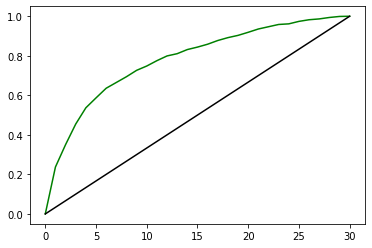

In [19]:
# plot neural network gains, then select best (highest gain + smooth)
# plt.plot(gains_nn_b_zb,'red')
# plt.plot(gains_nn_b_zf,'orange')
# plt.plot(gains_nn_b_rfm,'brown')
plt.plot(gains_nn_b_zb_rfm,'green') # highest gain from original graph with all included
# plt.plot(gains_nn_b_zf_rfm,'blue')
# plt.plot(gains_nn_ks,'purple') # has a wird kink in it
plt.plot([0,30],[0,1],'black') # reference line

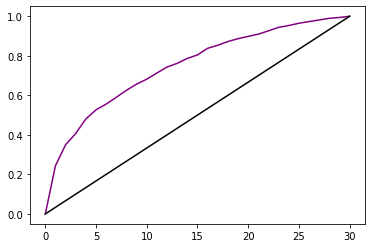

In [20]:
# plot logit gains, then select best (highest gain + smooth)
# plt.plot(gains_logit_b_zb,'red')
# plt.plot(gains_logit_b_zf,'orange')
# plt.plot(gains_logit_b_rfm,'brown')
# plt.plot(gains_logit_b_zb_rfm,'green')
# plt.plot(gains_logit_b_zf_rfm,'blue')
plt.plot(gains_logit_ks,'purple') # highest gain from original graph with all included
plt.plot([0,30],[0,1],'black') # reference line

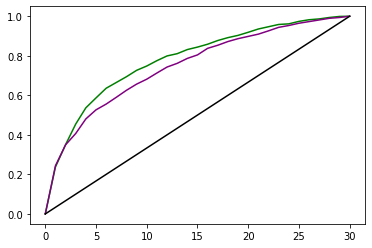

In [21]:
# plot both together
plt.plot(gains_nn_b_zb_rfm,'green') # best nn model
plt.plot(gains_logit_ks,'purple') # best logit model (no interactions)
plt.plot([0,30],[0,1],'black') # reference line

In [22]:
result_logit_ks.summary() # summary of our best logit model (no interactions)

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                20000
Model:                    Mba263Logit   Df Residuals:                    19957
Method:                           MLE   Df Model:                           42
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.1390
Time:                        14:45:11   Log-Likelihood:                -3319.0
converged:                       True   LL-Null:                       -3854.7
Covariance Type:            nonrobust   LLR p-value:                3.796e-197
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.3542      1.309     -3.328      0.001      -6.919      -1.790
bizflag        -0.0749      0.088     -0.848      0.396      -0.248       0.098
numords         0.4275      0.112      3.824      0.000       0.208       0.647
dollars         0.0003      0.001      0.559      0.576      -0.001       0.002
last           -0.0186      0.030     -0.621      0.535      -0.077       0.040
sincepurch      0.0052      0.007      0.804      0.422      -0.008       0.018
version1        0.7013      0.143      4.908      0.000       0.421       0.981
owntaxprod      0.1472      0.189      0.777      0.437      -0.224       0.519
upgraded        0.8452      0.139      6.061      0.000       0.572       1.118
sex_F          -0.6042      0.651     -0.928      0.354      -1.881       0.672
sex_M          -0.5078      0.648     -0.784      0.433      -1.777       0.761
sex_U          -0.5183      0.655     -0.791      0.429      -1.803       0.766
zip_first_1     1.5272      1.039      1.470      0.142      -0.509       3.564
zip_first_2     1.3637      1.050      1.299      0.194      -0.695       3.422
zip_first_3     2.1863      1.078      2.029      0.043       0.074       4.299
zip_first_4     2.2919      1.101      2.081      0.037       0.133       4.450
zip_first_5     2.1368      1.098      1.946      0.052      -0.015       4.289
zip_first_6     2.0628      1.077      1.915      0.055      -0.048       4.174
zip_first_7     1.9552      1.065      1.835      0.066      -0.133       4.043
zip_first_8     3.2388      1.028      3.152      0.002       1.225       5.253
zip_first_9     2.1712      1.072      2.025      0.043       0.069       4.273
zip_bins_2     -1.5556      0.309     -5.036      0.000      -2.161      -0.950
zip_bins_3     -1.7306      0.198     -8.725      0.000      -2.119      -1.342
zip_bins_4     -1.2019      0.252     -4.775      0.000      -1.695      -0.709
zip_bins_5     -0.8618      0.288     -2.995      0.003      -1.426      -0.298
zip_bins_6     -1.2168      0.297     -4.103      0.000      -1.798      -0.636
zip_bins_7     -1.6442      0.376     -4.373      0.000      -2.381      -0.907
zip_bins_8     -2.3268      0.390     -5.965      0.000      -3.091      -1.562
zip_bins_9     -1.7537      0.437     -4.013      0.000      -2.610      -0.897
zip_bins_10    -1.4651      0.409     -3.584      0.000      -2.266      -0.664
zip_bins_11    -1.6804      0.372     -4.520      0.000      -2.409      -0.952
zip_bins_12    -1.1420      0.338     -3.383      0.001      -1.804      -0.480
zip_bins_13    -1.6256      0.344     -4.720      0.000      -2.301      -0.951
zip_bins_14    -2.3674      0.241     -9.815      0.000      -2.840      -1.895
zip_bins_15    -2.5999      0.182    -14.272      0.000      -2.957      -2.243
zip_bins_16    -2.0743      0.308     -6.729      0.000      -2.678      -1.470
zip_bins_17    -1.8658      0.368     -5.072      0.000      -2.587      -1.145
zip_bins_18    -1.4698      0.355     -4.

In [23]:
mba263.odds_ratios(result_logit_ks) # odds ratios for our best logit model (no interactions)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
bizflag,0.927801,0.081999,0.880484,0.379,0.768722,1.086880
numords,1.533469,0.171447,3.111576,0.002,1.200863,1.866075
dollars,1.000349,0.000624,0.559150,0.576,0.999138,1.001560
last,0.981564,0.029415,0.626756,0.531,0.924498,1.038630
sincepurch,1.005248,0.006547,0.801572,0.423,0.992547,1.017949
version1,2.016395,0.288141,3.527419,0.000,1.457401,2.575388
owntaxprod,1.158581,0.219496,0.722476,0.470,0.732758,1.584403
upgraded,2.328361,0.324651,4.091652,0.000,1.698537,2.958185
sex_F,0.546496,0.355955,1.274046,0.203,-0.144057,1.237050
sex_M,0.601848,0.389699,1.021691,0.307,-0.154168,1.357864


In [24]:
# now want to start exploring interaction variables
# considering the following eleigible for interaction:
    # 'bizflag',
    # 'version1',
    # 'owntaxprod',
    # 'upgraded',
    # 'sex_F',
    # 'sex_M',
    # 'sex_U',
    # 'rec_ntile',
    # 'freq_ntile',
    # 'mon_ntile'

# adding interaction variables to dataframe
dfIntuit['bizflag_version1'] = dfIntuit['bizflag']*dfIntuit['version1']
dfIntuit['bizflag_owntaxprod'] = dfIntuit['bizflag']*dfIntuit['owntaxprod']
dfIntuit['bizflag_upgraded'] = dfIntuit['bizflag']*dfIntuit['upgraded']
dfIntuit['bizflag_sex_F'] = dfIntuit['bizflag']*dfIntuit['sex_F']
dfIntuit['bizflag_sex_M'] = dfIntuit['bizflag']*dfIntuit['sex_M']
dfIntuit['bizflag_sex_U'] = dfIntuit['bizflag']*dfIntuit['sex_U']
dfIntuit['bizflag_rec_ntile'] = dfIntuit['bizflag']*dfIntuit['rec_ntile']
dfIntuit['bizflag_freq_ntile'] = dfIntuit['bizflag']*dfIntuit['freq_ntile']
dfIntuit['bizflag_mon_ntile'] = dfIntuit['bizflag']*dfIntuit['mon_ntile']

dfIntuit['version1_owntaxprod'] = dfIntuit['version1']*dfIntuit['owntaxprod']
dfIntuit['version1_upgraded'] = dfIntuit['version1']*dfIntuit['upgraded']
dfIntuit['version1_sex_F'] = dfIntuit['version1']*dfIntuit['sex_F']
dfIntuit['version1_sex_M'] = dfIntuit['version1']*dfIntuit['sex_M']
dfIntuit['version1_sex_U'] = dfIntuit['version1']*dfIntuit['sex_U']
dfIntuit['version1_rec_ntile'] = dfIntuit['version1']*dfIntuit['rec_ntile']
dfIntuit['version1_freq_ntile'] = dfIntuit['version1']*dfIntuit['freq_ntile']
dfIntuit['version1_mon_ntile'] = dfIntuit['version1']*dfIntuit['mon_ntile']

dfIntuit['owntaxprod_upgraded'] = dfIntuit['owntaxprod']*dfIntuit['upgraded']
dfIntuit['owntaxprod_sex_F'] = dfIntuit['owntaxprod']*dfIntuit['sex_F']
dfIntuit['owntaxprod_sex_M'] = dfIntuit['owntaxprod']*dfIntuit['sex_M']
dfIntuit['owntaxprod_sex_U'] = dfIntuit['owntaxprod']*dfIntuit['sex_U']
dfIntuit['owntaxprod_rec_ntile'] = dfIntuit['owntaxprod']*dfIntuit['rec_ntile']
dfIntuit['owntaxprod_freq_ntile'] = dfIntuit['owntaxprod']*dfIntuit['freq_ntile']
dfIntuit['owntaxprod_mon_ntile'] = dfIntuit['owntaxprod']*dfIntuit['mon_ntile']

dfIntuit['upgraded_sex_F'] = dfIntuit['upgraded']*dfIntuit['sex_F']
dfIntuit['upgraded_sex_M'] = dfIntuit['upgraded']*dfIntuit['sex_M']
dfIntuit['upgraded_sex_U'] = dfIntuit['upgraded']*dfIntuit['sex_U']
dfIntuit['upgraded_rec_ntile'] = dfIntuit['upgraded']*dfIntuit['rec_ntile']
dfIntuit['upgraded_freq_ntile'] = dfIntuit['upgraded']*dfIntuit['freq_ntile']
dfIntuit['upgraded_mon_ntile'] = dfIntuit['upgraded']*dfIntuit['mon_ntile']

dfIntuit['sex_F_rec_ntile'] = dfIntuit['sex_F']*dfIntuit['rec_ntile']
dfIntuit['sex_F_freq_ntile'] = dfIntuit['sex_F']*dfIntuit['freq_ntile']
dfIntuit['sex_F_mon_ntile'] = dfIntuit['sex_F']*dfIntuit['mon_ntile']

dfIntuit['sex_M_rec_ntile'] = dfIntuit['sex_M']*dfIntuit['rec_ntile']
dfIntuit['sex_M_freq_ntile'] = dfIntuit['sex_M']*dfIntuit['freq_ntile']
dfIntuit['sex_M_mon_ntile'] = dfIntuit['sex_M']*dfIntuit['mon_ntile']

dfIntuit['sex_U_rec_ntile'] = dfIntuit['sex_U']*dfIntuit['rec_ntile']
dfIntuit['sex_U_freq_ntile'] = dfIntuit['sex_U']*dfIntuit['freq_ntile']
dfIntuit['sex_U_mon_ntile'] = dfIntuit['sex_U']*dfIntuit['mon_ntile']

dfIntuit['rec_ntile_freq_ntile'] = dfIntuit['rec_ntile']*dfIntuit['freq_ntile']
dfIntuit['rec_ntile_mon_ntile'] = dfIntuit['rec_ntile']*dfIntuit['mon_ntile']
dfIntuit['freq_ntile_mon_ntile'] = dfIntuit['freq_ntile']*dfIntuit['mon_ntile']

In [25]:
list(dfIntuit.columns)

['id',
 'sex',
 'bizflag',
 'zip',
 'zip_bins',
 'numords',
 'dollars',
 'last',
 'sincepurch',
 'version1',
 'owntaxprod',
 'upgraded',
 'res1',
 'zip_first',
 'sex_F',
 'sex_M',
 'sex_U',
 'zip_first_1',
 'zip_first_2',
 'zip_first_3',
 'zip_first_4',
 'zip_first_5',
 'zip_first_6',
 'zip_first_7',
 'zip_first_8',
 'zip_first_9',
 'zip_bins_2',
 'zip_bins_3',
 'zip_bins_4',
 'zip_bins_5',
 'zip_bins_6',
 'zip_bins_7',
 'zip_bins_8',
 'zip_bins_9',
 'zip_bins_10',
 'zip_bins_11',
 'zip_bins_12',
 'zip_bins_13',
 'zip_bins_14',
 'zip_bins_15',
 'zip_bins_16',
 'zip_bins_17',
 'zip_bins_18',
 'zip_bins_19',
 'zip_bins_20',
 'rec_ntile',
 'freq_ntile',
 'mon_ntile',
 'rfm_index',
 'responserate_wave1',
 'meets_wave2_mailing_cutoff',
 'pred_nn_b_zb',
 'pred_nn_b_zf',
 'pred_nn_b_rfm',
 'pred_nn_b_zb_rfm',
 'pred_nn_b_zf_rfm',
 'pred_nn_ks',
 'pred_logit_b_zb',
 'pred_logit_b_zf',
 'pred_logit_b_rfm',
 'pred_logit_b_zb_rfm',
 'pred_logit_b_zf_rfm',
 'pred_logit_ks',
 'bizflag_version1',
 '

In [26]:
interaction_vars = [
    'bizflag_version1',
    'bizflag_owntaxprod',
    'bizflag_upgraded',
    'bizflag_sex_F',
    'bizflag_sex_M',
    'bizflag_sex_U',
    'bizflag_rec_ntile',
    'bizflag_freq_ntile',
    'bizflag_mon_ntile',
    'version1_owntaxprod',
    'version1_upgraded',
    'version1_sex_F',
    'version1_sex_M',
    'version1_sex_U',
    'version1_rec_ntile',
    'version1_freq_ntile',
    'version1_mon_ntile',
    'owntaxprod_upgraded',
    'owntaxprod_sex_F',
    'owntaxprod_sex_M',
    'owntaxprod_sex_U',
    'owntaxprod_rec_ntile',
    'owntaxprod_freq_ntile',
    'owntaxprod_mon_ntile',
    'upgraded_sex_F',
    'upgraded_sex_M',
    'upgraded_sex_U',
    'upgraded_rec_ntile',
    'upgraded_freq_ntile',
    'upgraded_mon_ntile',
    'sex_F_rec_ntile',
    'sex_F_freq_ntile',
    'sex_F_mon_ntile',
    'sex_M_rec_ntile',
    'sex_M_freq_ntile',
    'sex_M_mon_ntile',
    'sex_U_rec_ntile',
    'sex_U_freq_ntile',
    'sex_U_mon_ntile',
    'rec_ntile_freq_ntile',
    'rec_ntile_mon_ntile',
    'freq_ntile_mon_ntile'
    ]

In [27]:
# configure new list of variables including interactions
# ksi = basic_vars + zip_first_vars + zip_bins_vars + rfm_ntile_vars + interaction_vars # kitchen sink with interactions
ksi = basic_vars + zip_bins_vars + rfm_ntile_vars + interaction_vars # kitchen sink with interactions, less zip_first

In [28]:
# run reglarized regression since we now have so many variables
result_logit_reg_ksi = mba263.logit_reg(dfIntuit['res1'],dfIntuit[ksi],alpha=10)
dfIntuit['pred_logit_reg_ksi'] = result_logit_reg_ksi.predict()
mba263.odds_ratios(result_logit_ksi)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18099944626880243
            Iterations: 249
            Function evaluations: 260
            Gradient evaluations: 249


NameError: name 'result_logit_ksi' is not defined

In [29]:
# run reglarized regression since we now have so many variables
result_logit_reg_ksi = mba263.logit_reg(dfIntuit['res1'],dfIntuit[ksi],alpha=10)
dfIntuit['pred_logit_reg_ksi'] = result_logit_reg_ksi.predict()
mba263.odds_ratios(result_logit_reg_ksi)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18099944626880243
            Iterations: 249
            Function evaluations: 260
            Gradient evaluations: 249


,Odds ratios,std err,z,P>|z|,[0.025,0.975]
bizflag,1.000000,NaN,NaN,NaN,NaN,NaN
numords,0.856950,0.113902,1.255899,0.209,0.635979,1.077921
dollars,0.999481,0.000714,0.726613,0.467,0.998097,1.000866
last,0.954652,0.008431,5.378593,0.000,0.938296,0.971009
sincepurch,1.017098,0.006373,2.682928,0.007,1.004735,1.029461
...,...,...,...,...,...,...
sex_U_freq_ntile,1.000000,NaN,NaN,NaN,NaN,NaN
sex_U_mon_ntile,1.000000,NaN,NaN,NaN,NaN,NaN
rec_ntile_freq_ntile,1.006889,0.005243,1.313810,0.189,0.996717,1.017061
rec_ntile_mon_ntile,0.989436,0.005858,1.803431,0.071,0.978072,1.000800


In [30]:
result_logit_reg_ksi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                20000
Model:                    Mba263Logit   Df Residuals:                    19957
Method:                           MLE   Df Model:                           42
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                 0.07908
Time:                        14:46:09   Log-Likelihood:                -3549.8
converged:                       True   LL-Null:                       -3854.7
Covariance Type:            nonrobust   LLR p-value:                8.658e-102
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2346      0.684     -1.804      0.071      -2.576       0.106
bizflag                        0        nan        nan        nan         nan         nan
numords                  -0.1544      0.133     -1.161      0.245      -0.415       0.106
dollars                  -0.0005      0.001     -0.726      0.468      -0.002       0.001
last                     -0.0464      0.009     -5.255      0.000      -0.064      -0.029
sincepurch                0.0170      0.006      2.706      0.007       0.005       0.029
version1                  0.9991      0.202      4.947      0.000       0.603       1.395
owntaxprod                     0        nan        nan        nan         nan         nan
upgraded                  0.2919      0.217      1.343      0.179      -0.134       0.718
sex_F                          0        nan        nan        nan         nan         nan
sex_M                          0        nan        nan        nan         nan         nan
sex_U                          0        nan        nan        nan         nan         nan
zip_bins_2               -0.1220      0.165     -0.741      0.458      -0.445       0.201
zip_bins_3               -0.1398      0.166     -0.843      0.399      -0.465       0.185
zip_bins_4               -0.2533      0.172     -1.477      0.140      -0.589       0.083
zip_bins_5               -0.1079      0.162     -0.665      0.506      -0.426       0.210
zip_bins_6               -0.1751      0.166     -1.056      0.291      -0.500       0.150
zip_bins_7               -0.0841      0.162     -0.519      0.604      -0.402       0.234
zip_bins_8               -0.5789      0.195     -2.976      0.003      -0.960      -0.198
zip_bins_9               -0.0843      0.159     -0.529      0.597      -0.397       0.228
zip_bins_10                    0        nan        nan        nan         nan         nan
zip_bins_11              -0.1827      0.165     -1.109      0.267      -0.506       0.140
zip_bins_12                    0        nan        nan        nan         nan         nan
zip_bins_13              -0.2601      0.170     -1.531      0.126      -0.593       0.073
zip_bins_14              -0.3737      0.180     -2.080      0.038      -0.726      -0.022
zip_bins_15              -0.0094      0.157     -0.060      0.952      -0.316       0.297
zip_bins_16              -0.2980      0.175     -1.707      0.088      -0.640       0.044
zip_bins_17              -0.2672      0.172     -1.558      0.119      -0.603       0.069
zip_bins_18                    0        nan        nan        nan         nan         nan
zip_bins_19              -0.2407      0.169     -1.425      0.154      -0.572       0.090
zip_bins_20              -0.1369      0.166     -0.826      0.409      -0.462       0.188
rec_ntile                      0        nan        nan        nan         nan         nan
freq_ntile               -0.1498      0.076     -1.961      0.050      -0.299      -0.000
m

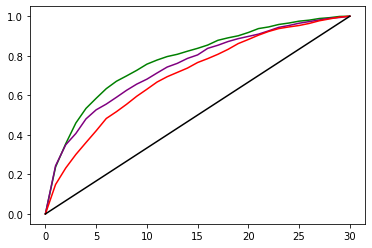

In [214]:
# regularized logit gains alongside previous models
gains_logit_reg_ksi = mba263.gain(dfIntuit['res1'],dfIntuit['pred_logit_reg_ksi'],30)
plt.plot(gains_nn_b_zb_rfm,'green') # best nn model
plt.plot(gains_logit_ks,'purple') # best logit model (no interactions)
plt.plot(gains_logit_reg_ksi,'red')
plt.plot([0,30],[0,1],'black')